In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_city_Day.csv')

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,Month,Year
0,Ahmedabad,2015-01-01,58.37,107.96,0.92,18.22,17.15,14.89,0.92,27.64,133.36,149.0,Moderate,1,2015
1,Ahmedabad,2015-01-02,58.37,107.96,0.97,15.69,16.46,14.89,0.97,24.55,34.06,106.0,Moderate,1,2015
2,Ahmedabad,2015-01-03,58.37,107.96,17.40,19.30,29.70,14.89,17.40,29.07,30.70,303.0,Very Poor,1,2015
3,Ahmedabad,2015-01-04,58.37,107.96,1.70,18.48,17.97,14.89,1.70,18.59,36.08,106.0,Moderate,1,2015
4,Ahmedabad,2015-01-05,58.37,107.96,22.10,21.42,37.76,14.89,22.10,39.33,39.31,330.0,Very Poor,1,2015


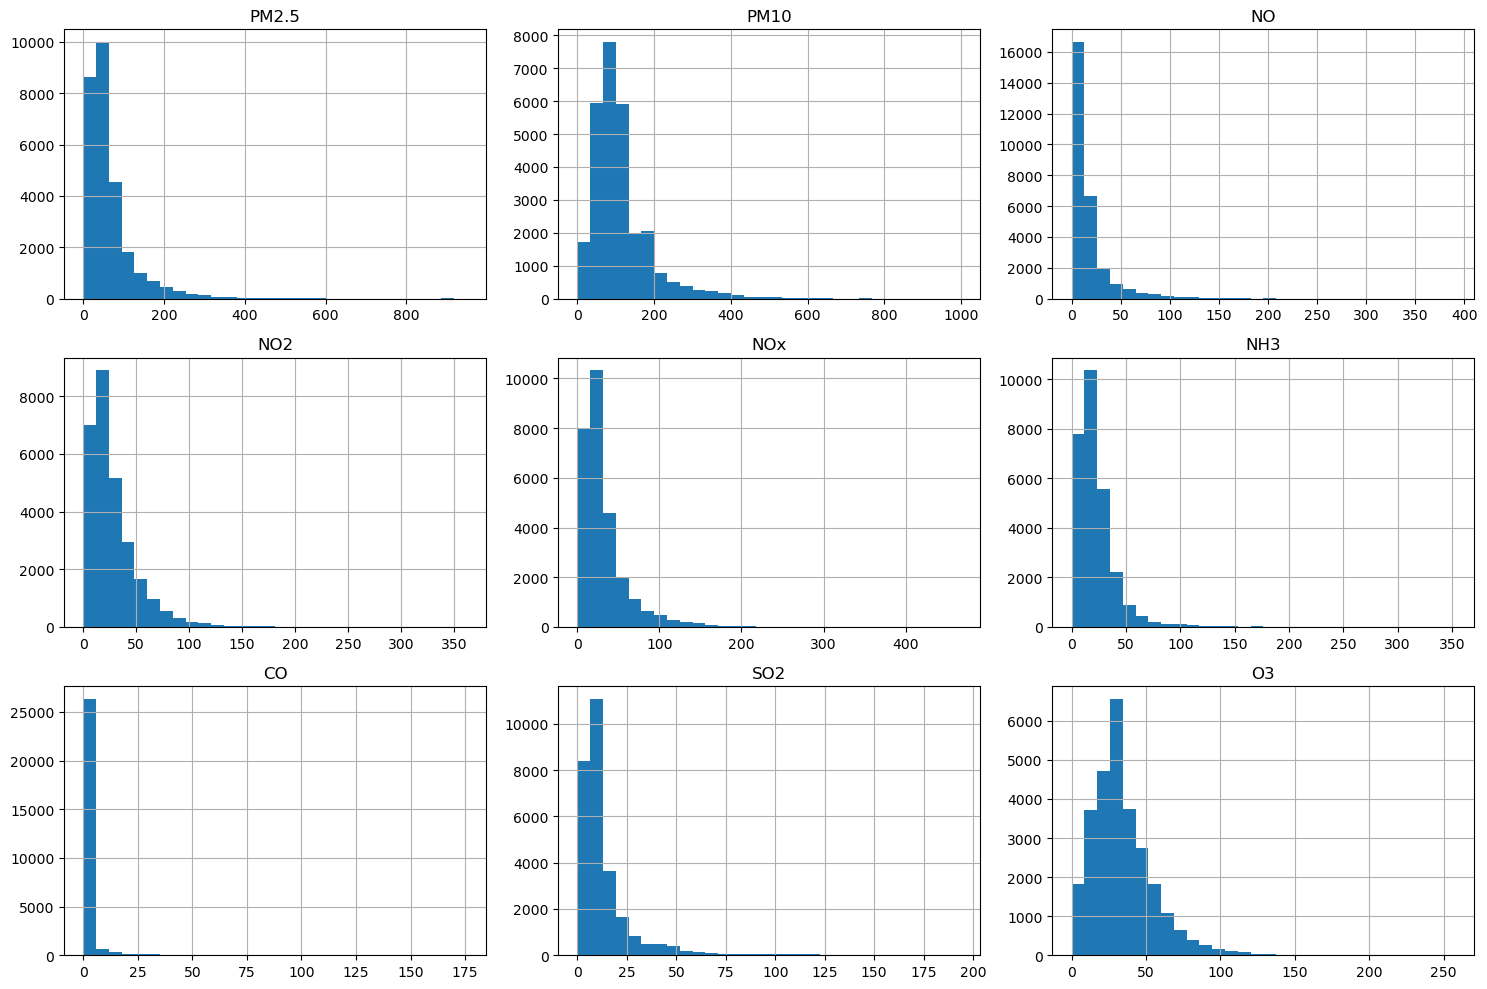

In [6]:
Air_Distribution = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']

# Plot histograms
df[Air_Distribution].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.savefig('PollutantHistograms.png', dpi=300, bbox_inches='tight')
plt.show()

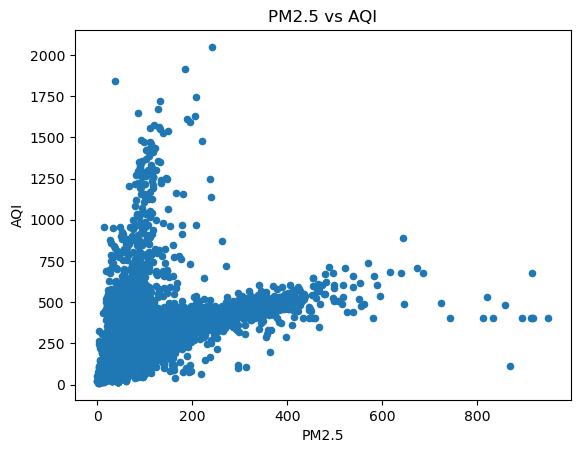

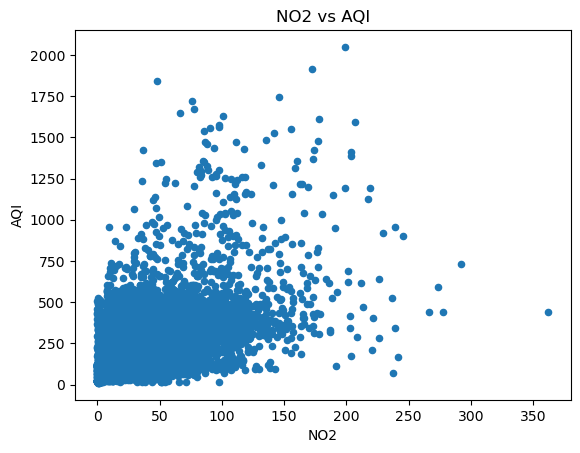

In [5]:
# Scatter plot between PM2.5 and AQI
df.plot.scatter(x='PM2.5', y='AQI')
plt.title('PM2.5 vs AQI')
plt.show()

# Scatter plot between NO2 and AQI
df.plot.scatter(x='NO2', y='AQI')
plt.title('NO2 vs AQI')
plt.show()

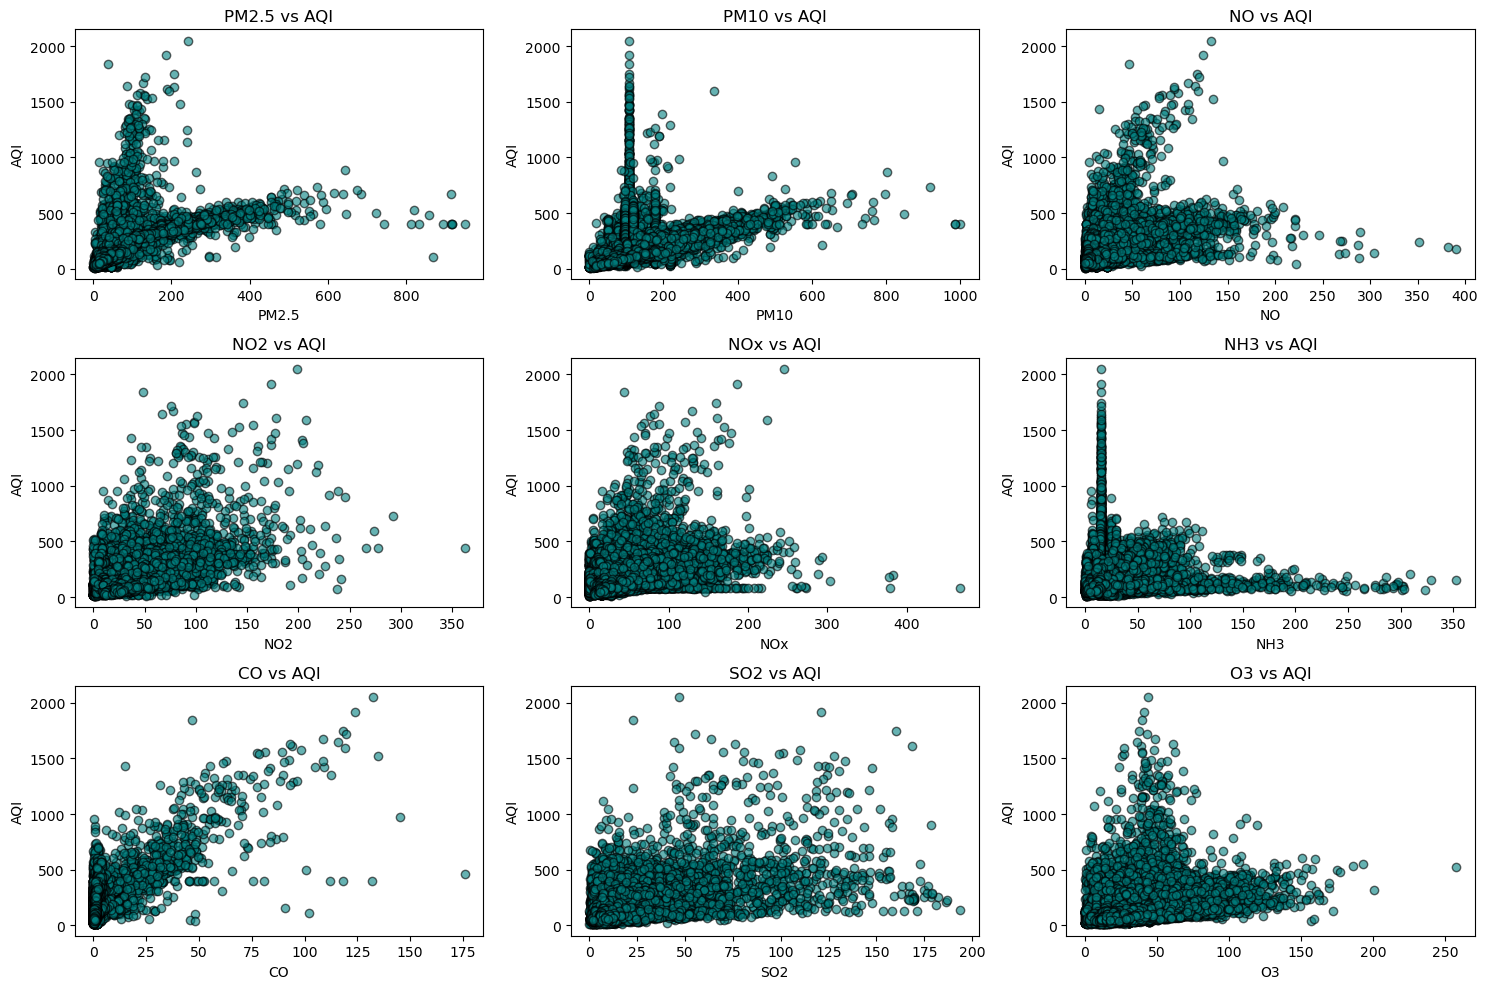

In [7]:
n = len(Air_Distribution)
cols = 3
rows = (n // cols) + (n % cols > 0)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten in case of a 2D grid

# Plot each scatterplot
for i, pollutant in enumerate(Air_Distribution):
    axes[i].scatter(df[pollutant], df['AQI'], alpha=0.6, color='teal', edgecolor='k')
    axes[i].set_title(f'{pollutant} vs AQI')
    axes[i].set_xlabel(pollutant)
    axes[i].set_ylabel('AQI')

# Remove unused subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('PollutantScatterPlots.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
average_aqi_per_year = df.groupby('Year')['AQI'].mean().reset_index()
average_aqi_per_year

,Year,AQI
0,2015,185.302975
1,2016,180.618286
2,2017,164.202089
3,2018,178.040345
4,2019,155.398214
5,2020,113.479860


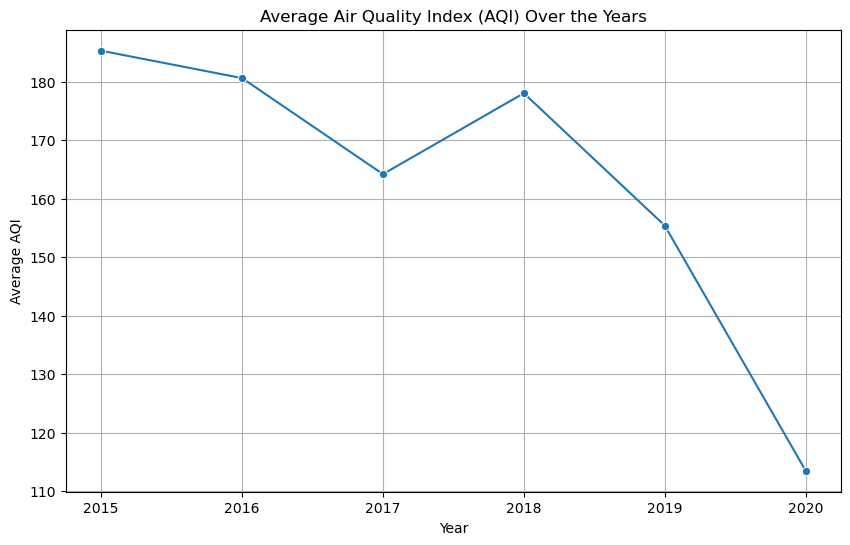

In [10]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=average_aqi_per_year, x='Year', y='AQI', marker='o')
plt.title('Average Air Quality Index (AQI) Over the Years')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.grid(True)
plt.savefig('Average AQI per year.png')
plt.show()

In [8]:
# Calculate the average level of each pollutant per city
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
avg_pollutants_per_city = df.groupby('City')[pollutants].mean()
avg_pollutants_per_city

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3
City,,,,,,,,,
Ahmedabad,67.626601,109.865286,22.362848,58.908396,47.366898,14.890000,22.130350,54.978261,39.178212
Aizawl,17.012301,23.313982,9.408053,0.388496,12.610354,22.308938,0.283628,7.378053,3.624646
Amaravati,37.729654,76.362020,4.436071,22.175748,15.380413,11.988493,0.626127,14.244632,38.115100
Amritsar,54.567270,114.784516,18.537906,18.481744,33.945080,14.357523,0.552671,7.950354,22.317805
Bengaluru,35.468271,82.193852,9.405371,27.992900,19.716517,21.742608,1.834514,5.518047,32.707613
Bhopal,50.059571,119.324321,7.037214,31.345321,22.428964,19.072071,0.880393,13.064821,59.851036
Brajrajnagar,63.888826,124.053485,16.773725,16.471035,24.407071,36.611338,1.798535,9.776503,16.152753
Chandigarh,40.742401,85.656546,10.454309,11.606382,15.003092,30.787928,0.631349,10.159375,20.047204
Chennai,50.196950,52.160365,9.183184,16.849053,17.661970,59.614846,1.067242,7.869098,32.419020


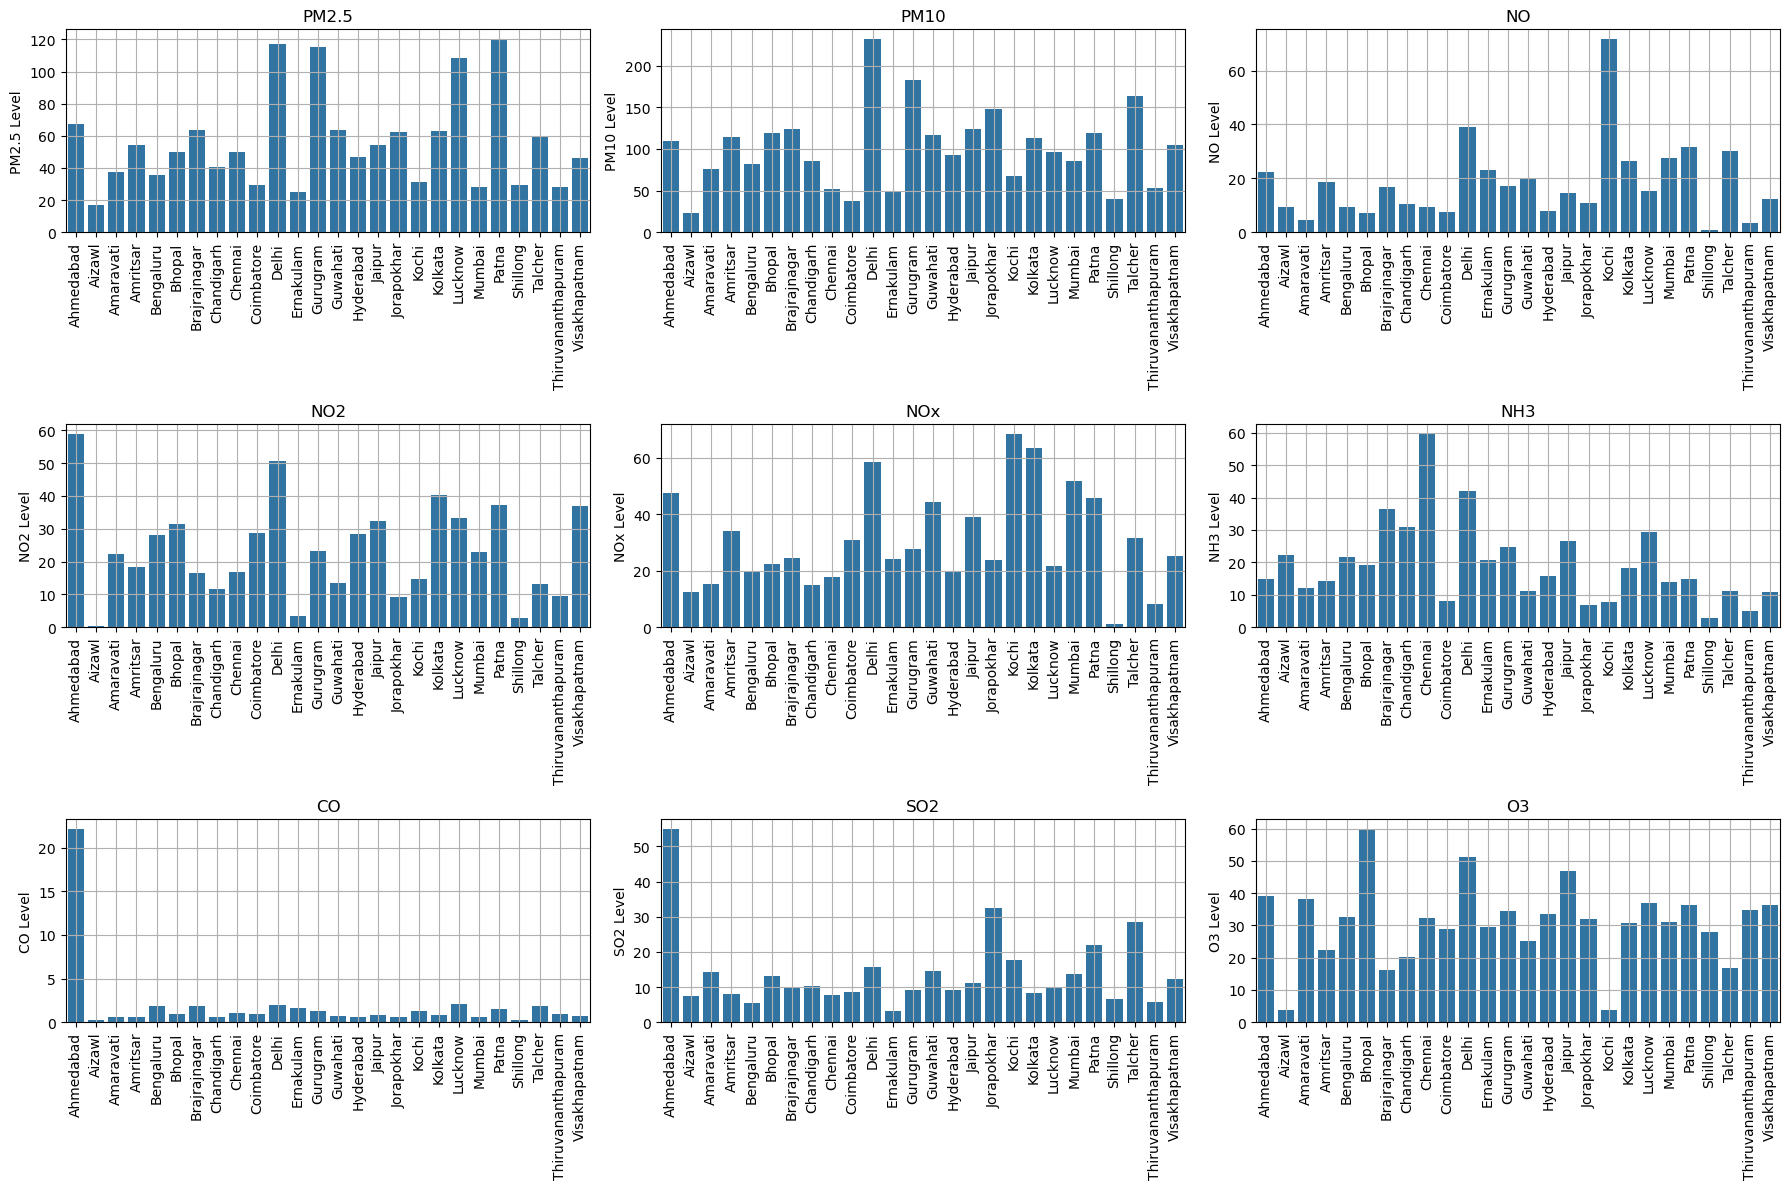

In [17]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
avg_pollutants_per_city = df.groupby('City')[pollutants].mean()

# Set up 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()  # Convert 2D array to 1D for easy indexing

# Plot each pollutant
for i, pol in enumerate(pollutants):
    sns.barplot(data=avg_pollutants_per_city.reset_index(), x='City', y=pol, ax=axes[i])
    axes[i].set_title(f'{pol}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(f'{pol} Level')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].grid(True)

# Hide any unused subplots (if any)
for j in range(len(pollutants), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('AvgPollutantBarCharts.png', dpi=300, bbox_inches='tight')
plt.show()


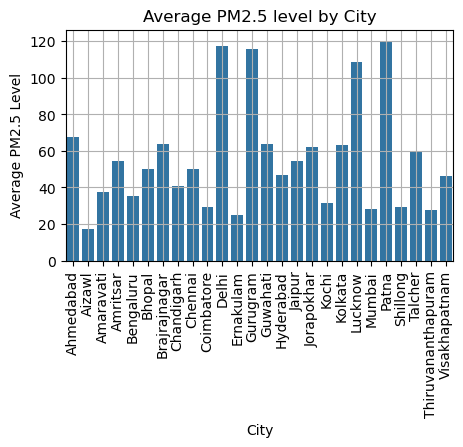

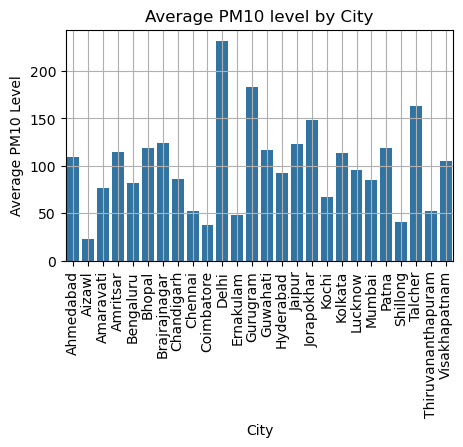

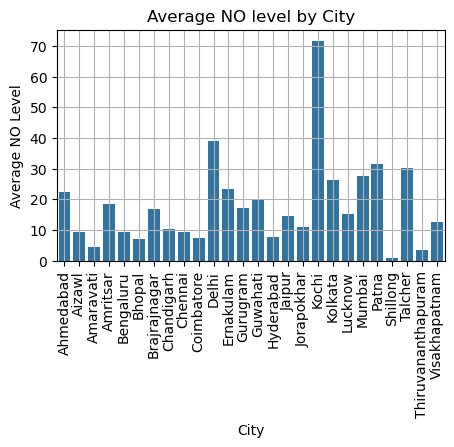

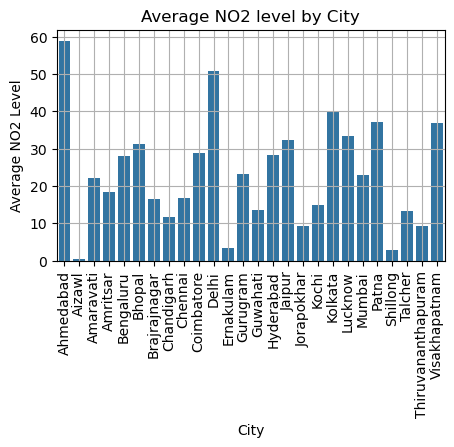

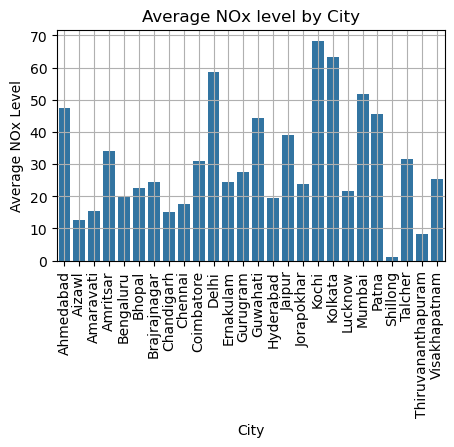

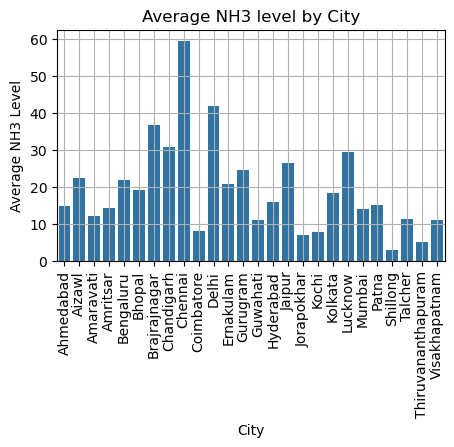

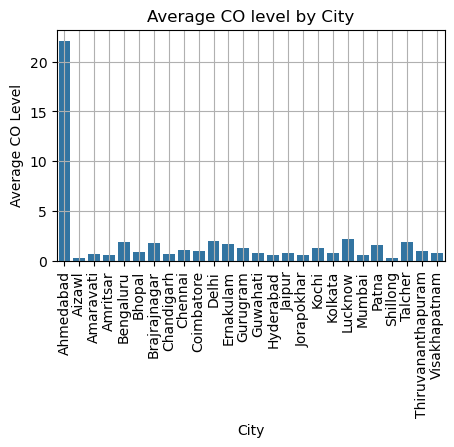

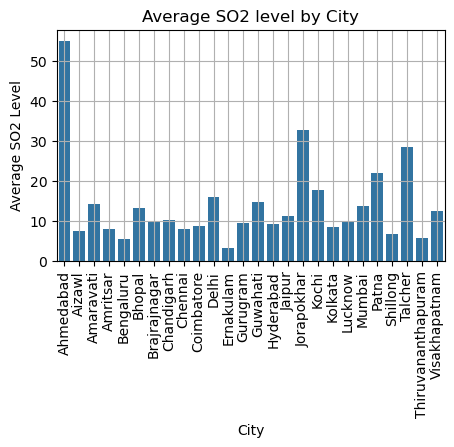

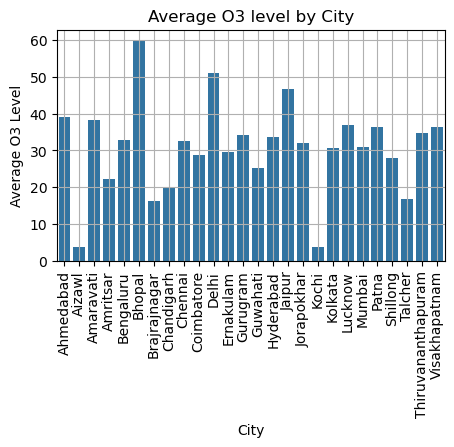

In [9]:
# Plot bar charts for average pollutant levels per city
for pol in pollutants:
    plt.figure(figsize=(5,3))
    sns.barplot(data = avg_pollutants_per_city, x='City', y=pol)
    plt.title(f'Average {pol} level by City')
    plt.xlabel('City')
    plt.ylabel(f'Average {pol} Level')
    plt.grid()
    plt.xticks(rotation = 90)
    plt.show()

CO at Ahmedabad shows very high levels compared to all other cities. And NO2 at Aizwal is too low compared to others. Check if that is actually the case or not.

In [19]:
#Count of Data in each city
df.groupby('City')['City'].value_counts()

City
Ahmedabad             1415
Aizawl                 113
Amaravati              896
Amritsar              1187
Bengaluru             2007
Bhopal                 280
Brajrajnagar           792
Chandigarh             304
Chennai               1985
Coimbatore             383
Delhi                 2009
Ernakulam              158
Gurugram              1618
Guwahati               502
Hyderabad             2001
Jaipur                1107
Jorapokhar             942
Kochi                  162
Kolkata                814
Lucknow               1990
Mumbai                1987
Patna                 1707
Shillong               277
Talcher                806
Thiruvananthapuram    1096
Visakhapatnam         1425
Name: count, dtype: int64

In [20]:
df.loc[df['City']=='Aizawl', ['Date','NO2']]

,Date,NO2
1415,2020-03-11,2.85
1416,2020-03-12,1.27
1417,2020-03-13,0.91
1418,2020-03-14,1.07
1419,2020-03-15,0.36
...,...,...
1523,2020-06-27,0.07
1524,2020-06-28,0.05
1525,2020-06-29,0.13
1526,2020-06-30,0.10


In [21]:
df.loc[(df['City'] == 'Aizwal') & (df['Year']!='2020'),]
# All records in Aizawl are for 2020, in which NO2 levels are very low.

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI,AQI_Bucket,Month,Year


In [22]:
#Count of records each year for each city
count_city_per_year = df.groupby(['City','Year'])['Year'].size()
pivot_table_unstack = count_city_per_year.unstack(fill_value=0)
pivot_table_unstack

Year,2015,2016,2017,2018,2019,2020
City,,,,,,
Ahmedabad,306,125,75,363,363,183
Aizawl,0,0,0,0,0,113
Amaravati,0,0,38,357,318,183
Amritsar,0,0,294,353,364,176
Bengaluru,365,364,365,365,365,183
Bhopal,0,0,0,0,106,174
Brajrajnagar,0,0,20,269,352,151
Chandigarh,0,0,0,0,121,183
Chennai,362,345,365,365,365,183


In [23]:
df_month = df.groupby(['Month', 'Year'])['AQI'].mean()
df_month_unstack = df_month.unstack(fill_value=0)
df_month_unstack

Year,2015,2016,2017,2018,2019,2020
Month,,,,,,
1,172.738318,245.262712,225.248201,243.172113,265.143369,167.329235
2,204.968586,210.140271,203.265823,224.971983,199.003883,157.998611
3,205.439815,181.709402,161.892857,196.292308,168.591453,109.980745
4,176.622010,174.589958,168.105442,151.846457,153.656475,85.194226
5,176.723502,151.824034,160.111111,142.401887,145.633731,87.922980
6,163.762500,144.917431,121.519520,147.860835,121.086643,79.296834
7,146.745968,135.411765,97.698630,104.100539,103.172697,71.880000
8,152.120968,127.026230,91.343490,110.667279,101.963875,0.000000
9,158.962025,130.684932,100.243478,120.827660,95.474097,0.000000


In [24]:
df_long_stacked = df_month_unstack.stack().reset_index(name='AQI_Value')
df_long_stacked

,Month,Year,AQI_Value
0,1,2015,172.738318
1,1,2016,245.262712
2,1,2017,225.248201
3,1,2018,243.172113
4,1,2019,265.143369
...,...,...,...
67,12,2016,238.133829
68,12,2017,216.057816
69,12,2018,252.366120
70,12,2019,179.768583


In [25]:
df_long_stacked['Date'] = pd.to_datetime(
    {'year': df_long_stacked['Year'],
     'month': df_long_stacked['Month'],
     'day': 1} # Assuming data refers to the 1st of each month
)
df_long_stacked

,Month,Year,AQI_Value,Date
0,1,2015,172.738318,2015-01-01
1,1,2016,245.262712,2016-01-01
2,1,2017,225.248201,2017-01-01
3,1,2018,243.172113,2018-01-01
4,1,2019,265.143369,2019-01-01
...,...,...,...,...
67,12,2016,238.133829,2016-12-01
68,12,2017,216.057816,2017-12-01
69,12,2018,252.366120,2018-12-01
70,12,2019,179.768583,2019-12-01


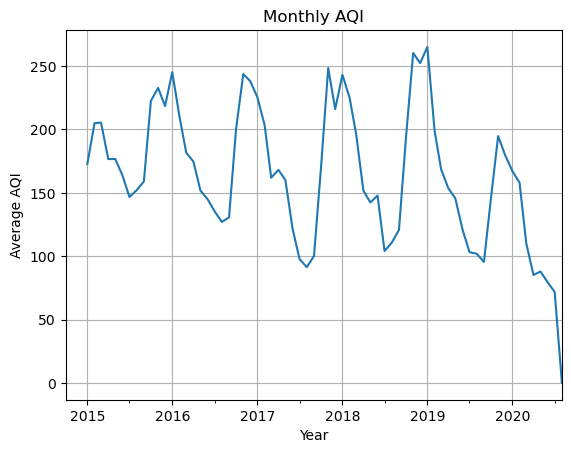

In [34]:
import seaborn as sns
import matplotlib.dates as mdates
sns.lineplot(data = df_long_stacked, x='Date', y='AQI_Value')
plt.title('Monthly AQI')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.xlim(pd.to_datetime("2014-10-01"), pd.to_datetime("2020-08-01"))
plt.grid()
# Set major ticks at each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set minor ticks every 6 months
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=(1, 7)))

plt.savefig('LineDiag for Monthly AQI.png')
plt.show()

In [35]:
df_daily = df.groupby('Date')['AQI'].mean()
df_daily = pd.DataFrame(df_daily).reset_index()
df_daily['Date'] = pd.to_datetime(df_daily['Date'])
df_daily

,Date,AQI
0,2015-01-01,180.333333
1,2015-01-02,174.666667
2,2015-01-03,190.333333
3,2015-01-04,148.142857
4,2015-01-05,177.285714
...,...,...
2004,2020-06-27,72.600000
2005,2020-06-28,77.480000
2006,2020-06-29,76.400000
2007,2020-06-30,70.400000


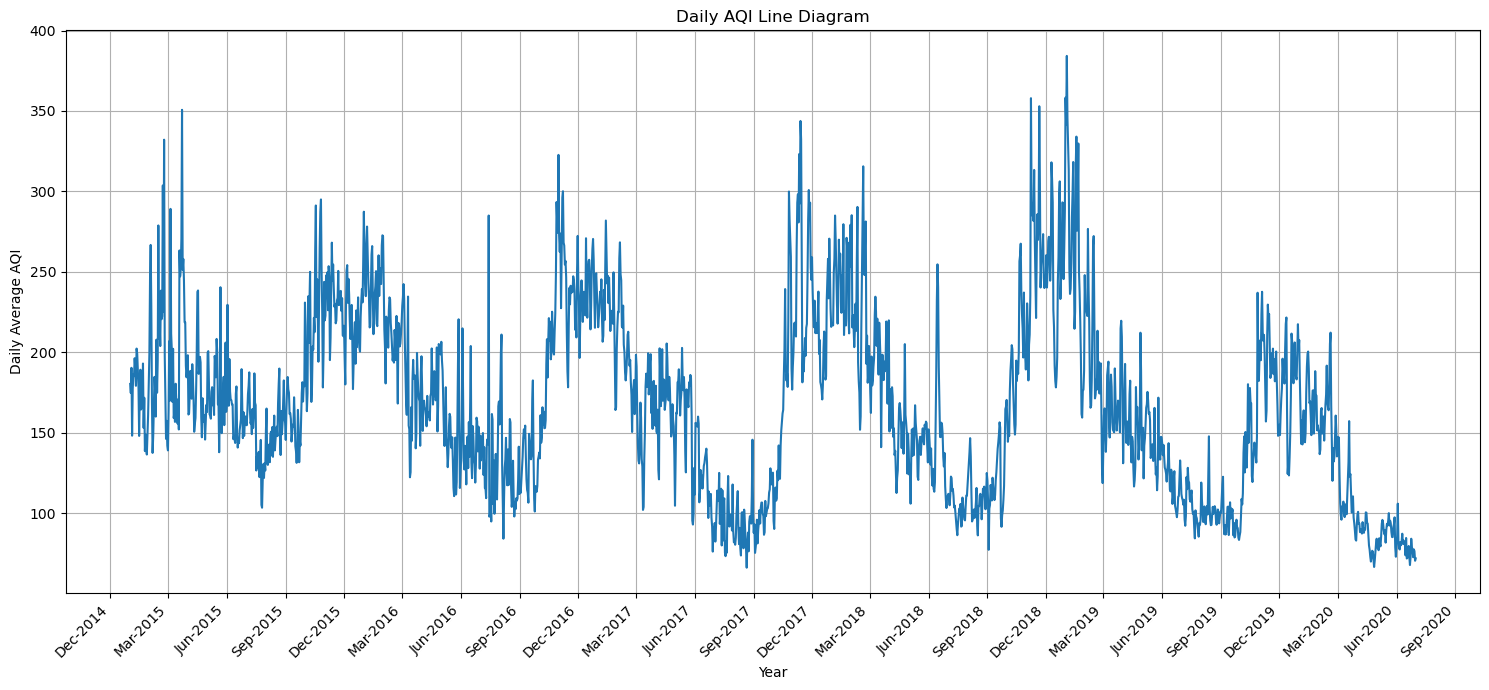

In [36]:
import matplotlib.dates as mdates
plt.figure(figsize=(15,7))
ax = sns.lineplot(data = df_daily, x='Date', y='AQI')
plt.title('Daily AQI Line Diagram')
plt.xlabel('Year')
plt.ylabel('Daily Average AQI')
plt.grid()
# Set major ticks to be at the beginning of each year
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Format the major ticks to display only the year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # Rotate labels for better readability if they overlap

plt.tight_layout()
plt.savefig('Daily AQI Line Diagram.png')
plt.show()

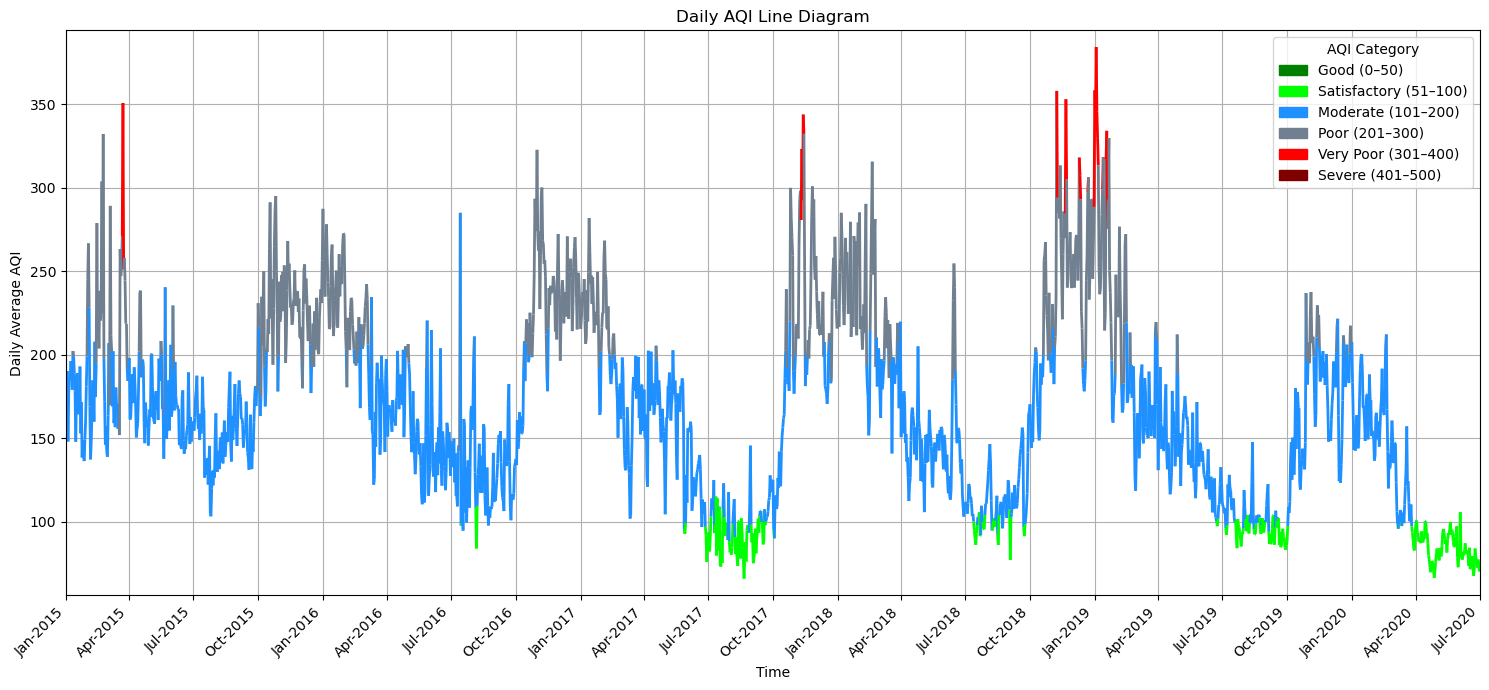

In [44]:
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.collections import LineCollection
import matplotlib.patches as mpatches

df_daily = df_daily.sort_values('Date')

# Create segments from points
dates = mdates.date2num(df_daily['Date'])
aqi = df_daily['AQI'].values

# Create segments for LineCollection
points = np.array([dates, aqi]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

def aqi_to_color(aqi_value):
    if aqi_value <= 50:
        return 'green'
    elif aqi_value <= 100:
        return 'lime'
    elif aqi_value <= 200:
        return 'dodgerblue'
    elif aqi_value <= 300:
        return 'slategrey'
    elif aqi_value <= 400:
        return 'red'
    else:
        return 'maroon'

# Create color list for each segment
colors = [aqi_to_color((a1 + a2) / 2) for a1, a2 in zip(aqi[:-1], aqi[1:])]

fig, ax = plt.subplots(figsize=(15, 7))
line_segments = LineCollection(segments, colors=colors, linewidth=2)
ax.add_collection(line_segments)

ax.set_xlim(dates.min(), dates.max())
ax.set_ylim(np.nanmin(aqi) - 10, np.nanmax(aqi) + 10)
ax.set_title('Daily AQI Line Diagram')
ax.set_xlabel('Time')
ax.set_ylabel('Daily Average AQI')
ax.grid(True)

# Date formatting
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

legend_labels = [
    mpatches.Patch(color='green', label='Good (0–50)'),
    mpatches.Patch(color='lime', label='Satisfactory (51–100)'),
    mpatches.Patch(color='dodgerblue', label='Moderate (101–200)'),
    mpatches.Patch(color='slategrey', label='Poor (201–300)'),
    mpatches.Patch(color='red', label='Very Poor (301–400)'),
    mpatches.Patch(color='maroon', label='Severe (401–500)'),
]

ax.legend(handles=legend_labels, title='AQI Category', loc='upper right')

plt.tight_layout()
plt.savefig('Daily AQI Line Diagram.png', dpi=300)
plt.show()


In [46]:
#Checking correlation among the pollutants
df_num = df.iloc[:, 2:11]
corr_mat = df_num.corr()
corr_mat

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3
PM2.5,1.000000,0.569104,0.412073,0.351488,0.352747,0.192119,0.096453,0.120565,0.160926
PM10,0.569104,1.000000,0.425617,0.359082,0.406170,0.133520,0.039870,0.184784,0.206310
NO,0.412073,0.425617,1.000000,0.449915,0.757399,0.123868,0.209082,0.164977,0.014422
NO2,0.351488,0.359082,0.449915,1.000000,0.571815,0.126692,0.359170,0.379739,0.295097
NOx,0.352747,0.406170,0.757399,0.571815,1.000000,0.083582,0.225185,0.201530,0.084530
NH3,0.192119,0.133520,0.123868,0.126692,0.083582,1.000000,-0.025242,-0.085890,0.081639
CO,0.096453,0.039870,0.209082,0.359170,0.225185,-0.025242,1.000000,0.473529,0.047533
SO2,0.120565,0.184784,0.164977,0.379739,0.201530,-0.085890,0.473529,1.000000,0.160383
O3,0.160926,0.206310,0.014422,0.295097,0.084530,0.081639,0.047533,0.160383,1.000000


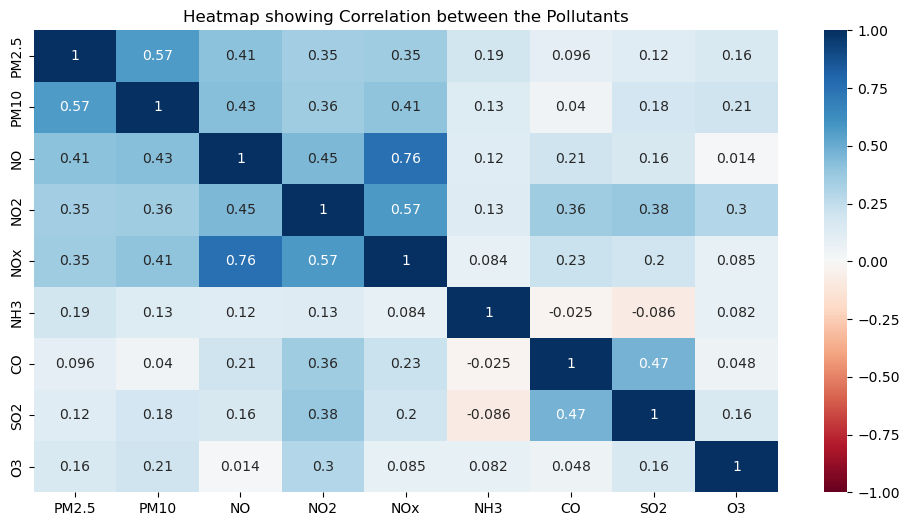

In [47]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(corr_mat, vmin = -1, vmax = 1, annot=True, cmap='RdBu')
plt.title('Heatmap showing Correlation between the Pollutants')
plt.savefig('CorrelationHeatmap.png')
plt.show()